In [332]:
# Libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Step 1: Reading and Cleaning Data

In [333]:
# read file
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [334]:
# check the shape
df.shape

(730, 16)

In [335]:
# overview of dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [336]:
# columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [337]:
# drop unwanted columns
# instant is just a row number. so not required
# we already have month and year columns. so dteday is not required
# we have causal + registered in cnt column. so casual and registered not required
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [338]:
# Map columns into readable format
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df.weekday = df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df.weathersit = df.weathersit.map({1:'Clear',2:'Mist',3:'Light_Snow_Or_Rain',4:'Heavy_Snow_Or_Rain'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [339]:
# Check for any null values
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

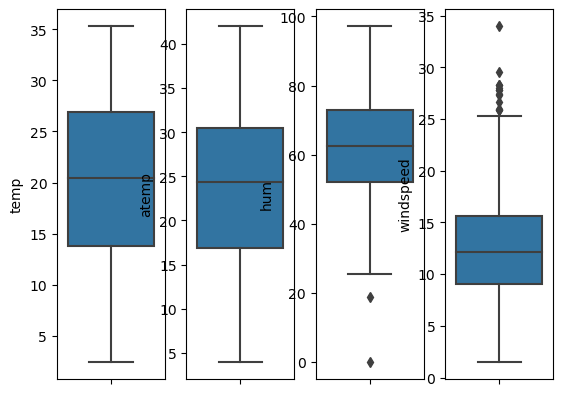

In [340]:
# Check for outliers in columns with continuous values other than target variable
cols_cont_vals = ['temp','atemp','hum','windspeed']
i = 1
for col in cols_cont_vals:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

- There aren't much of outliers to handle as per the above plots

# Step 2: EDA

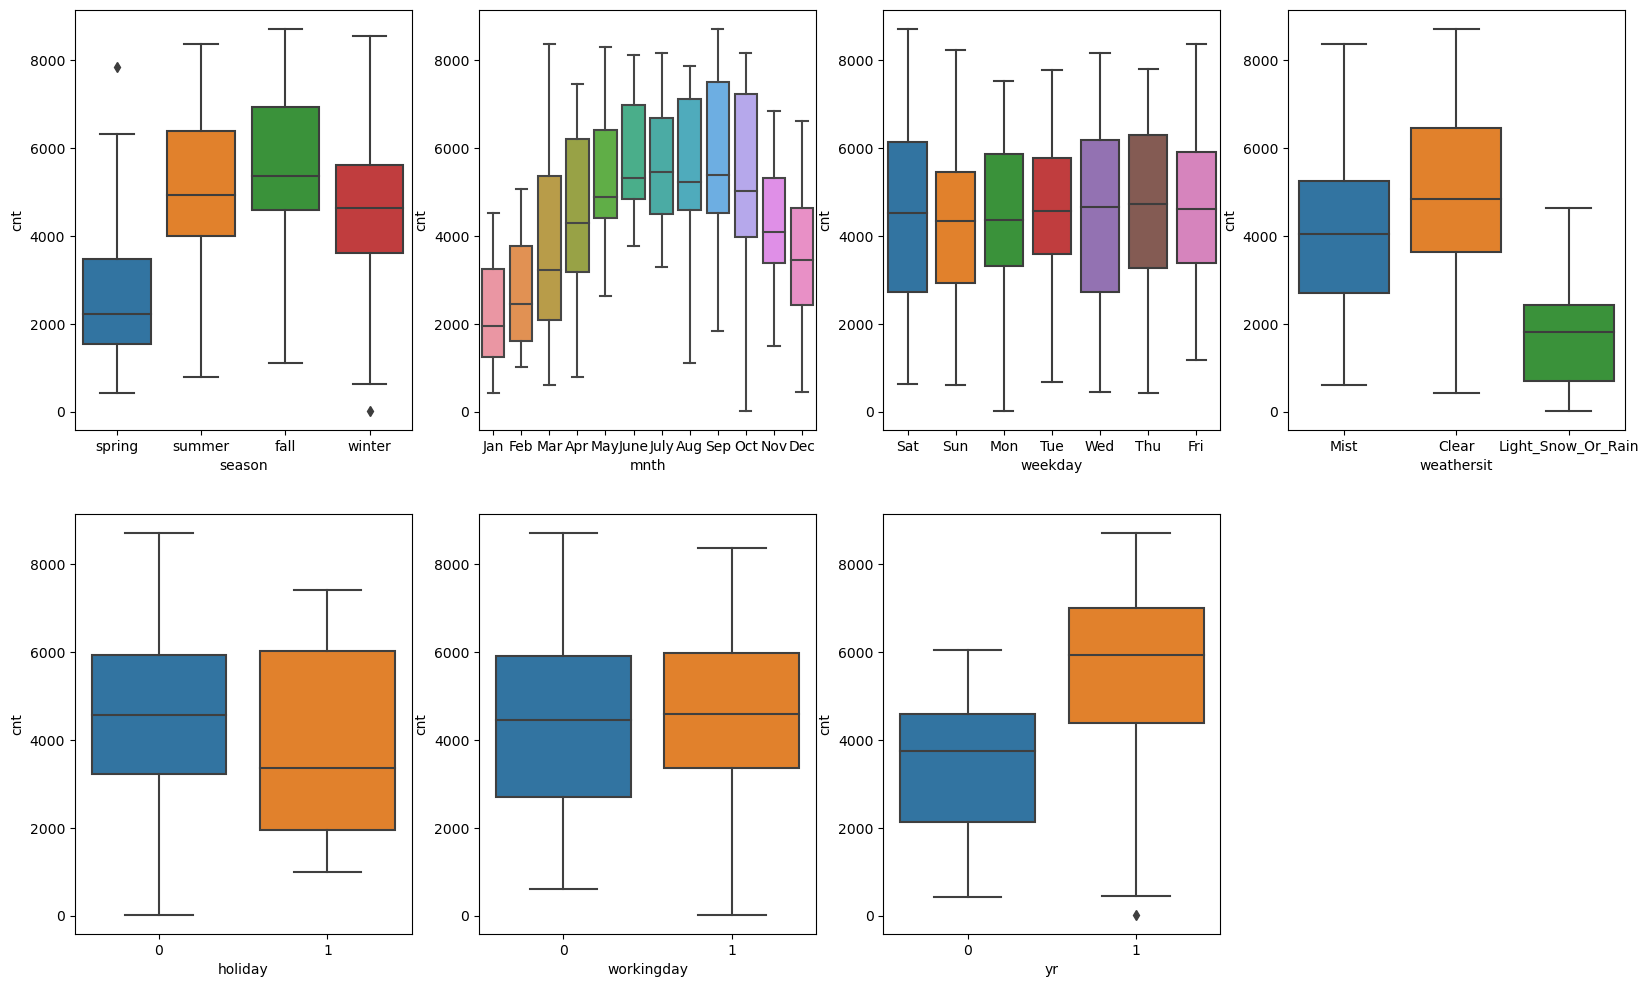

In [341]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

In [342]:
# function to create barplot for categorical columns with respect to cnt for both years

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',hue='yr',data=df)
    plt.legend(labels=['2018', '2019'])
    plt.show()

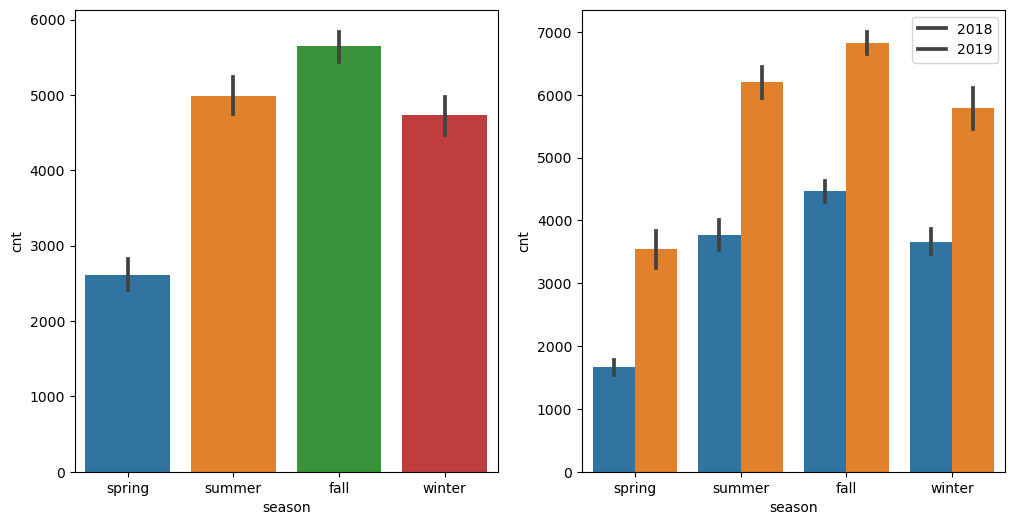

In [343]:
# plotting for season column

plot_cat_columns('season')

From the above, seems like fall season attracts more booking. Also bookings increased drastically for each season from 2018 to 2019

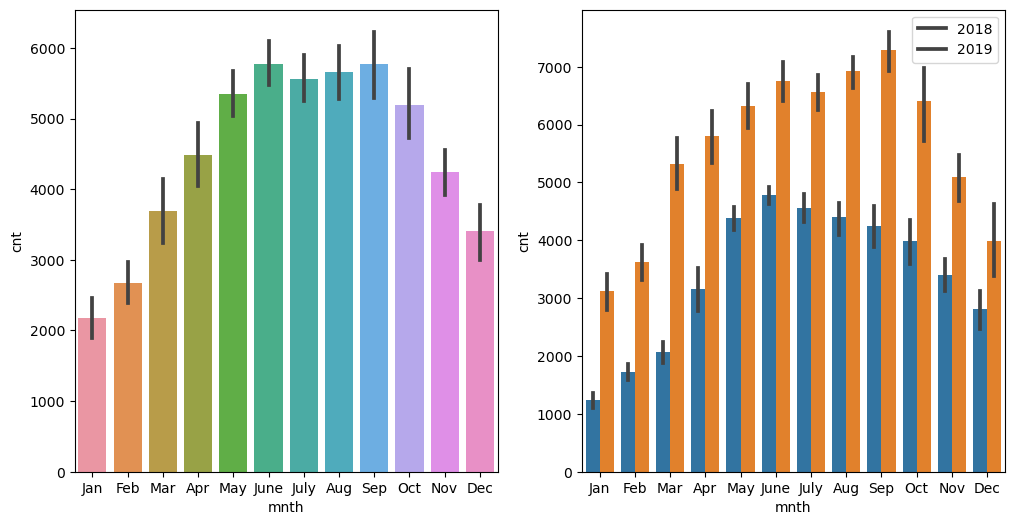

In [344]:
# plotting for month column

plot_cat_columns('mnth')

From the above seems like peak of the bookings is during may to oct. Bookings number increase gradually from jan to sep and then gradually decrease towards end of the year

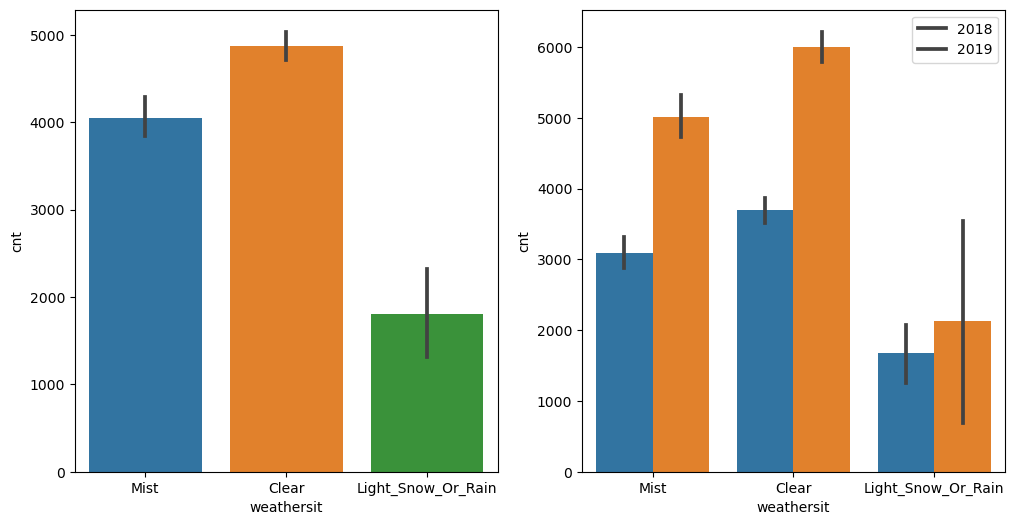

In [345]:
# plotting for weather column

plot_cat_columns('weathersit')

Clear weather attracts more bookings. Misty bookings are also good. Light snow or rain is worst condition for bookings

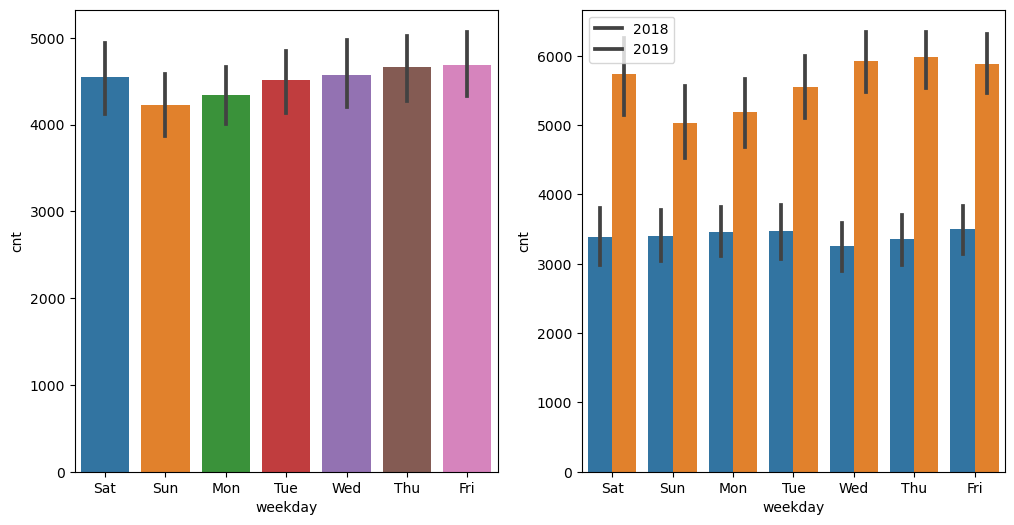

In [346]:
# plotting for weekday column

plot_cat_columns('weekday')

Thursday to Sunday have more number of bookings as compared to the start of the week.

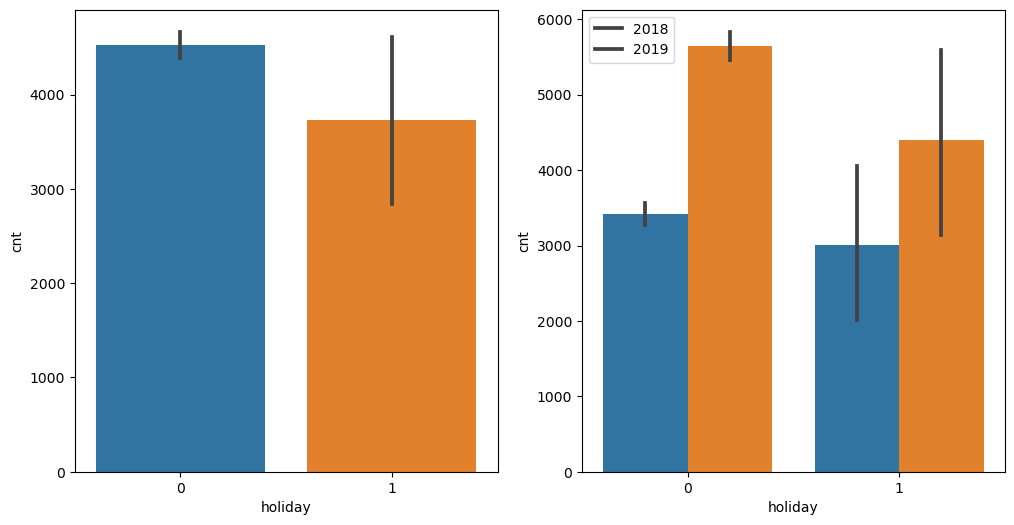

In [347]:
plot_cat_columns('holiday')

Less bookings during holidays

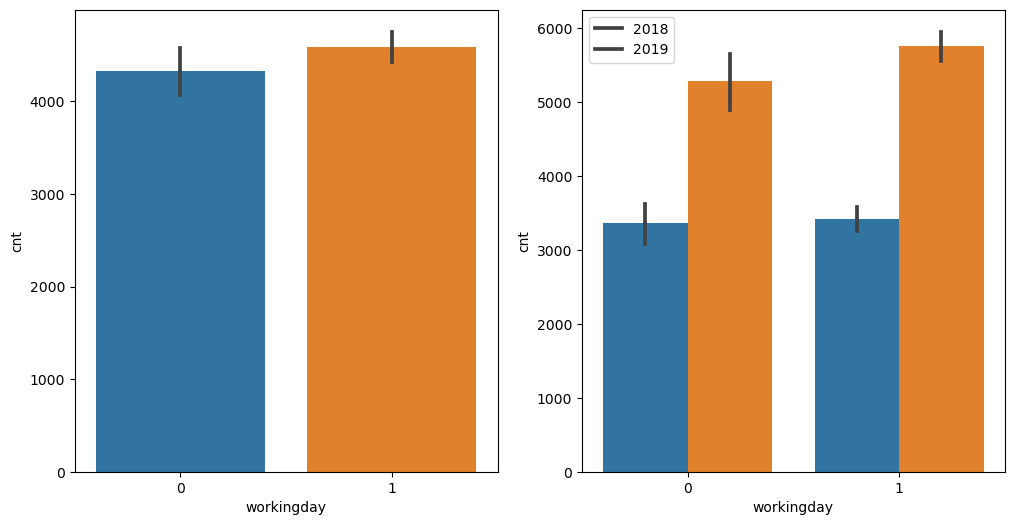

In [348]:
plot_cat_columns('workingday')

Almost equal no.of bookings either working day or not

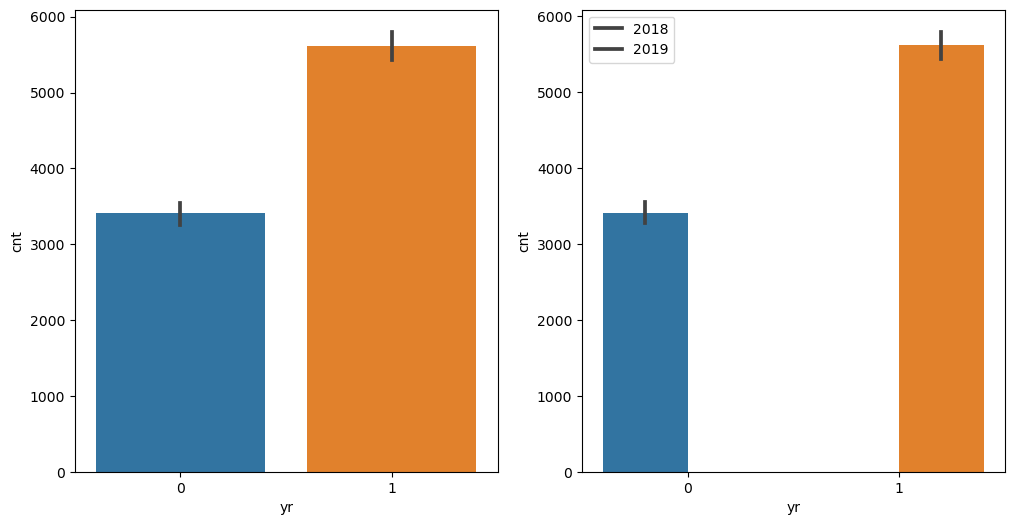

In [349]:
plot_cat_columns('yr')

2019 have more bookings from previous year, which shows good growth in business

C:\Users\Chandu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


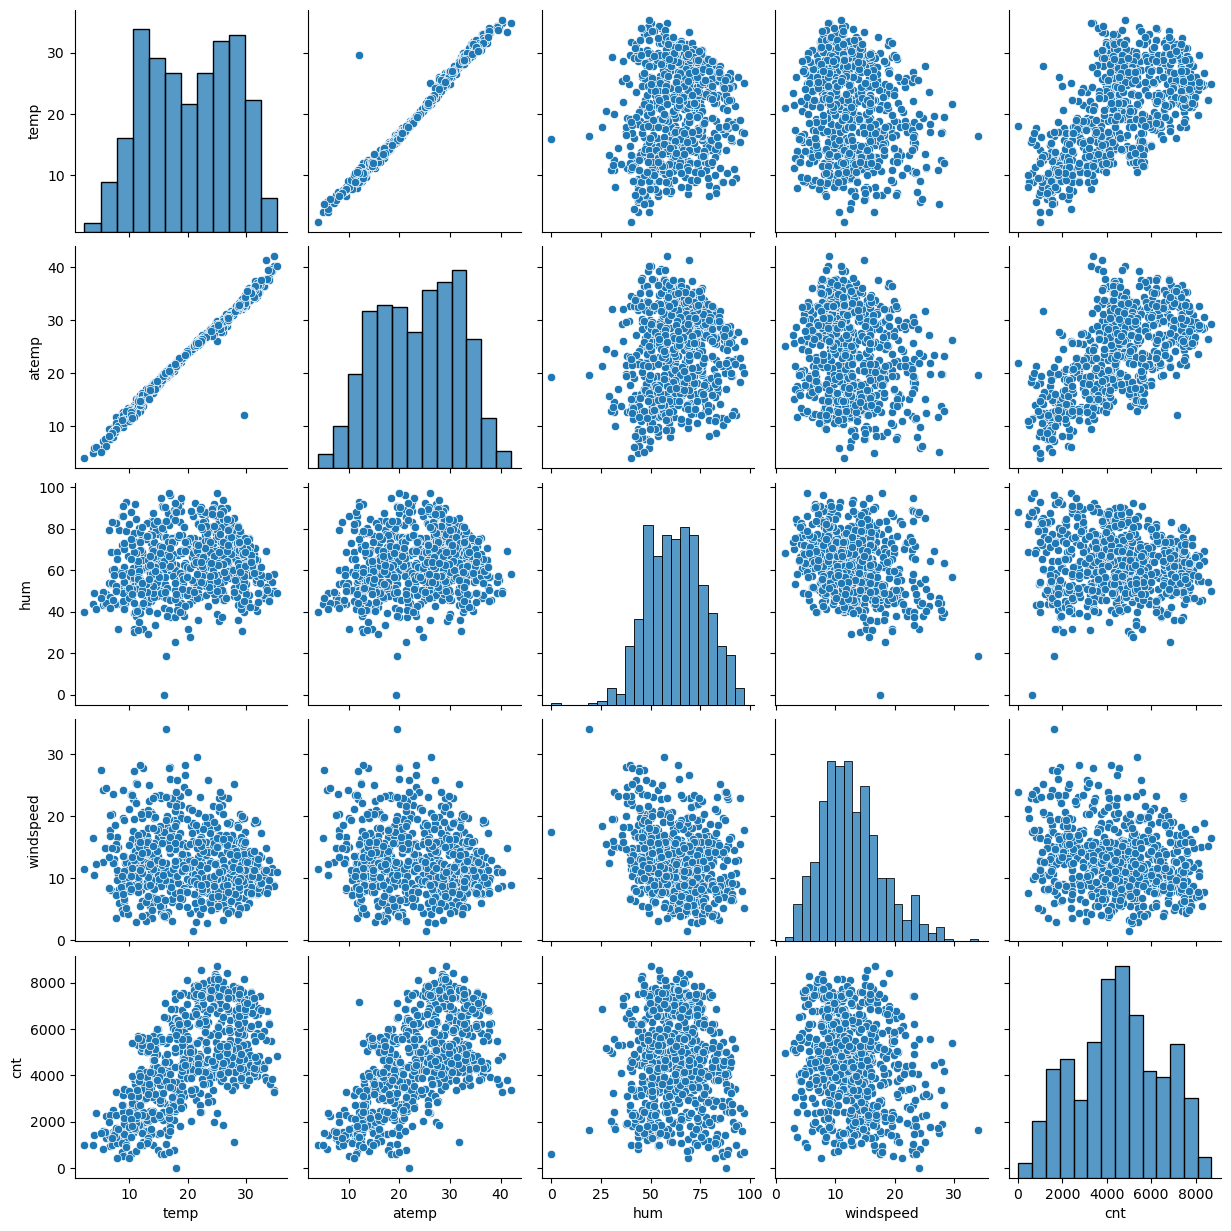

In [350]:
# Analysis on numerical columns

sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

### Summary of EDA

- Fall season attracts more booking
- Bookings number increase gradually from jan to sep and then gradually decrease towards end of the year
- Clear weather attracts more bookings followed by misty.
- Thursday to Sunday have more number of bookings as compared to the start of the week.
- Bookings reduce during holidays
- There is growth in business from 2018 to 2019
- Cnt is linearly increasing with temp indicating linear relation
- Hum values are more scattered around. Cnt is descreasing with increase in humidity
- Windspeed values are more scattered around. Cnt is descreasing with increase in windspeed

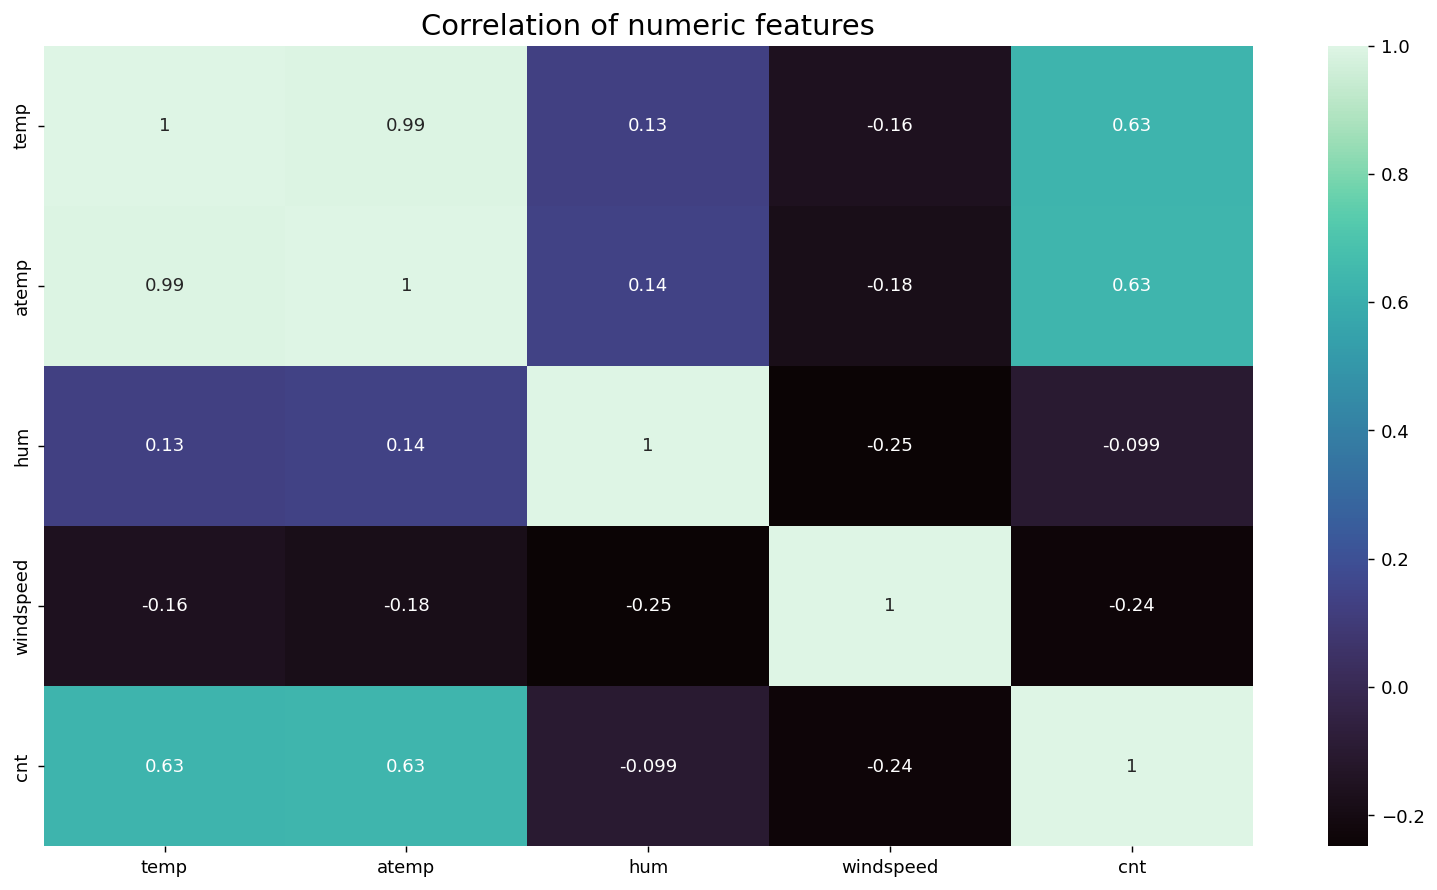

In [351]:
# Corr matrix
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(df[num_features].corr(),annot= True,cmap="mako")
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Step 3: Data Preperation for Line Regression

In [352]:
# Create dummy variables for categorical variables

months_df=pd.get_dummies(df.mnth,drop_first=True,dtype=int)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True,dtype=int)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True,dtype=int)
seasons_df=pd.get_dummies(df.season,drop_first=True,dtype=int)

In [353]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [354]:
# merge dataframe with dummy variable dataset

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Or_Rain,Mist,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [355]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              730 non-null    object 
 1   yr                  730 non-null    int64  
 2   mnth                730 non-null    object 
 3   holiday             730 non-null    int64  
 4   weekday             730 non-null    object 
 5   workingday          730 non-null    int64  
 6   weathersit          730 non-null    object 
 7   temp                730 non-null    float64
 8   atemp               730 non-null    float64
 9   hum                 730 non-null    float64
 10  windspeed           730 non-null    float64
 11  cnt                 730 non-null    int64  
 12  Aug                 730 non-null    int32  
 13  Dec                 730 non-null    int32  
 14  Feb                 730 non-null    int32  
 15  Jan                 730 non-null    int32  
 16  July    

In [356]:
# drop original columns of dummy variables

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Or_Rain,Mist,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


# Step 4: Split data into train and test sets

In [357]:
#y to contain only target variable
y = df_new.pop('cnt')
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_new, y, train_size = 0.7, random_state = 100)

In [358]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(510, 29)
(220, 29)
(510,)
(220,)


In [359]:
# Feature scaling of continuous variables to interpret easily
num_vars = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Or_Rain,Mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [360]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Or_Rain,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Use RFE to eliminate some columns

In [361]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(estimator = lr,n_features_to_select = 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [362]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light_Snow_Or_Rain', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [363]:
# Checking which columns are selected and rejected via REF
print(X_train.columns[rfe.support_])
print(X_train.columns[~rfe.support_])

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light_Snow_Or_Rain', 'Mist', 'spring', 'summer',
       'winter'],
      dtype='object')
Index(['atemp', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')


In [364]:
cols = X_train.columns[rfe.support_]

## Manual elimination with VIF

In [365]:
# Generic function to calculate VIF of variables

def calculateVIF(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif.sort_values(by='VIF',ascending=False))

In [366]:
calculateVIF(cols)

              Features    VIF
4                  hum  29.37
3                 temp  17.78
2           workingday   5.31
5            windspeed   4.73
12              spring   4.53
14              winter   3.46
13              summer   2.85
11                Mist   2.29
0                   yr   2.09
9                  Sat   1.98
6                  Jan   1.67
7                 July   1.59
8                  Sep   1.39
10  Light_Snow_Or_Rain   1.24
1              holiday   1.18


Humidity shows high VIF value

# Step 5: Building Linear Model

In [367]:
# Generic function to build model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [368]:
# Build 1st model
build_model(cols)
calculateVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          4.22e-191
Time:                        21:08:00   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2211.4527    314

In [369]:
# Building 2nd model
# drop humidity as it shows high VIF
cols = cols.drop('hum')
build_model(cols)
calculateVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.60e-188
Time:                        21:08:00   Log-Likelihood:                -4115.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1531.5352    273

VIF values seems to be good now. But we will see if we can reduce further ?

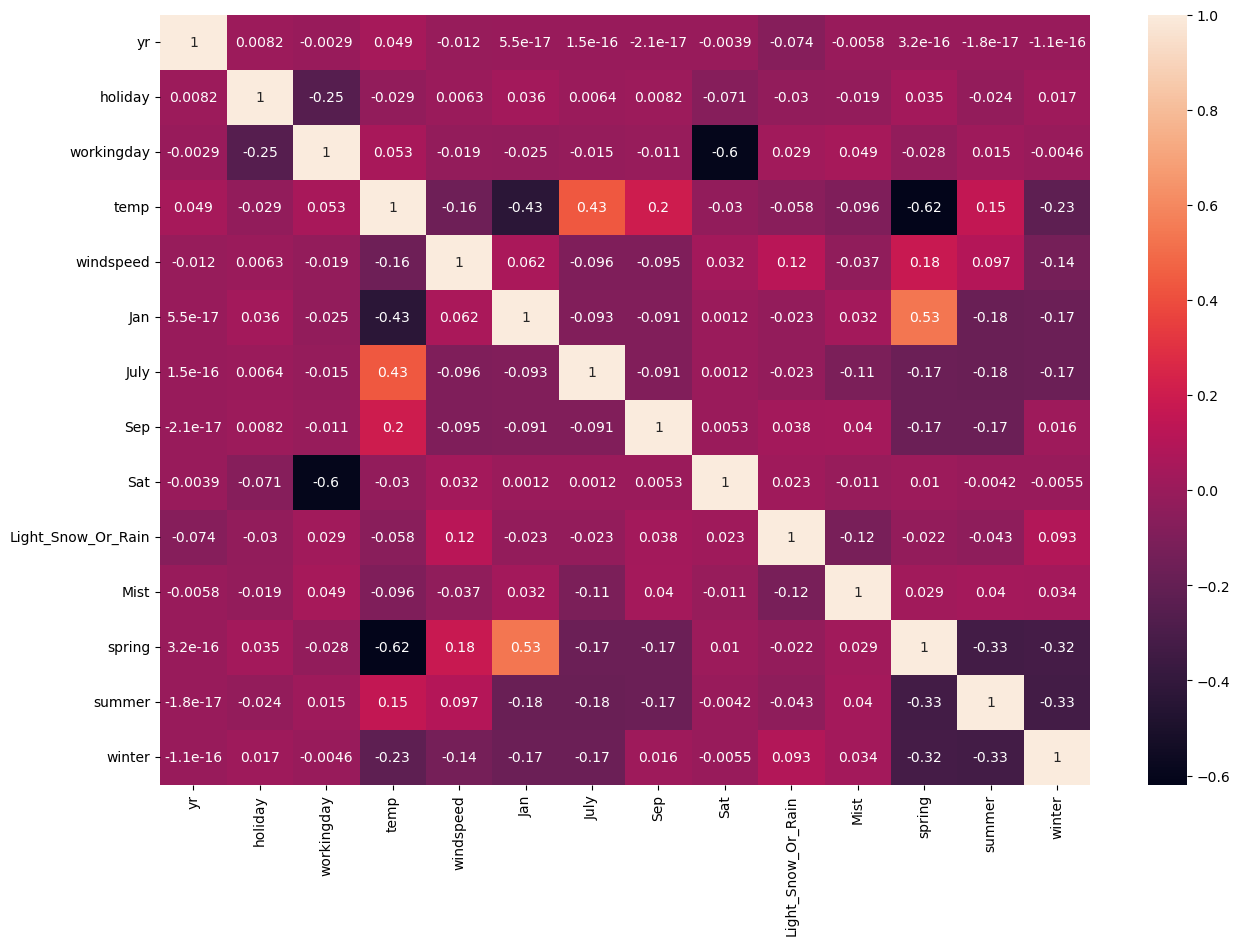

In [370]:
plt.figure(figsize = (15,10))
sns.heatmap(df_new[cols].corr(), annot=True)
plt.show()

In [371]:
# Building 3rd model
# Dropping Jan as it has negetive coefficient and high p-value
cols = cols.drop('Jan')
build_model(cols)
calculateVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.28e-188
Time:                        21:08:01   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1391.5045    267

In [372]:
# Building 4th model
# Dropping Holidy as it has negetive coefficient and high p-value
cols = cols.drop('holiday')
build_model(cols)
calculateVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          7.12e-189
Time:                        21:08:01   Log-Likelihood:                -4119.8
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     497   BIC:                             8321.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1319.2164    265

In [373]:
# Building 5th model
# Dropping July as it has negetive coefficient and high p-value
cols = cols.drop('July')
build_model(cols)
calculateVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.42e-188
Time:                        21:08:01   Log-Likelihood:                -4123.3
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     498   BIC:                             8321.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1243.9072    265

In [374]:
# Building 6th model
# Dropping summer as it's 
cols = cols.drop('summer')
build_model(cols)
calculateVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.39e-185
Time:                        21:08:01   Log-Likelihood:                -4133.2
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     499   BIC:                             8335.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1924.4285    221

We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

F-Statistics value of 245.7 (which is greater than 1) and the p-value of 1.39e-185 i.e almost equals to zero, states that the overall model is significant

In [378]:
X_train_sm = sm.add_constant(X_train[cols])
lr_m = sm.OLS(y_train, X_train_sm).fit()
print(lr_m.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.39e-185
Time:                        21:12:26   Log-Likelihood:                -4133.2
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     499   BIC:                             8335.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1924.4285    221

# Step 6: Residual Analysis of the train data and validation

In [379]:
X_train_sm

,const,yr,workingday,temp,windspeed,Sep,Sat,Light_Snow_Or_Rain,Mist,spring,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,0,0
111,1.0,0,1,0.345824,0.380981,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,1,0,0


In [380]:
y_train_pred = lr_m.predict(X_train_sm)

C:\Users\Chandu\AppData\Local\Temp\ipykernel_17980\3536760436.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

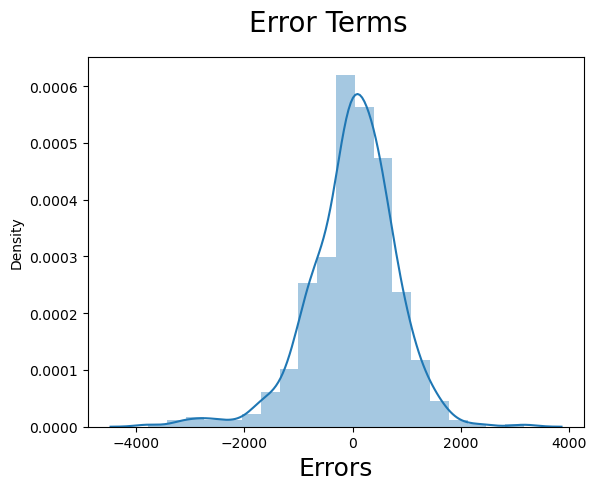

In [381]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

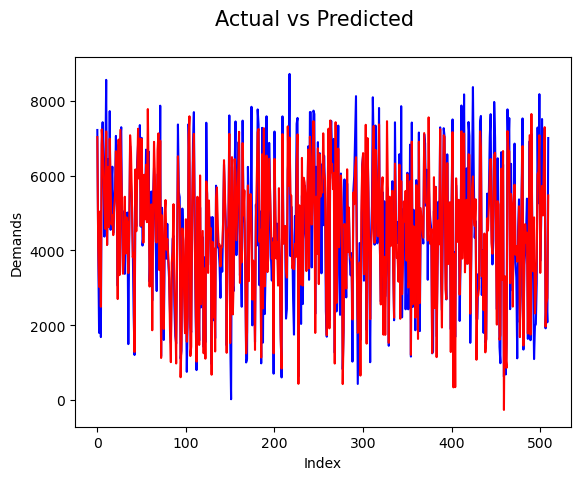

In [383]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok

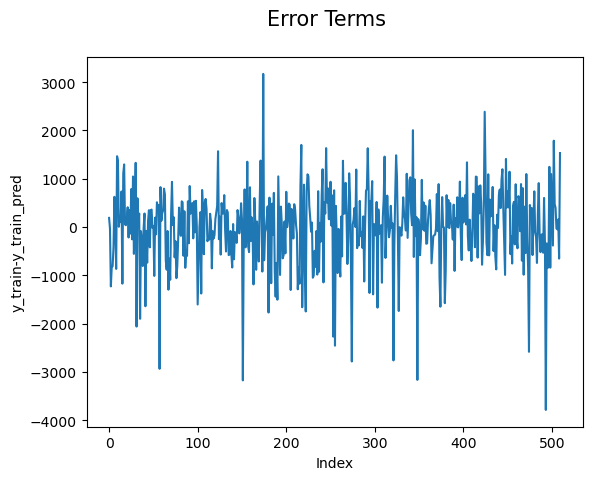

In [384]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

error terms are independent of each other.

In [382]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.831188981797333

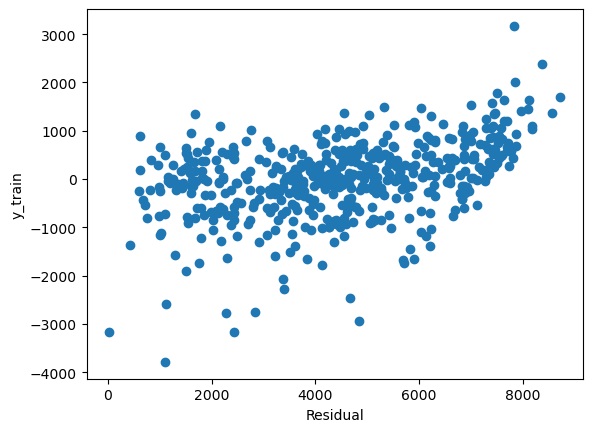

In [385]:
# scatter plot for the linearity check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

# Step 7: Making predictions using final modal

In [386]:
# predict values for test data set
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [388]:
X_test[cols]

,yr,workingday,temp,windspeed,Sep,Sat,Light_Snow_Or_Rain,Mist,spring,winter
184,0,0,0.831783,0.084219,0,0,0,1,0,0
535,1,1,0.901354,0.153728,0,0,0,0,0,0
299,0,1,0.511964,0.334206,0,0,0,1,0,1
221,0,1,0.881625,0.339570,0,0,0,0,0,0
152,0,1,0.817246,0.537414,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
702,1,1,0.519232,0.283397,0,0,0,0,0,1
127,0,0,0.584649,0.069510,0,0,0,0,0,0
640,1,1,0.745598,0.052115,0,0,0,1,0,1
72,0,1,0.331557,0.203418,0,0,0,0,1,0


In [393]:
#Predict the values for test data
X_test_sm = sm.add_constant(X_test[cols])

In [397]:
y_pred = lr_m.predict(X_test_sm)

In [398]:
r2_score(y_test, y_pred)

0.8077220924906864

# Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

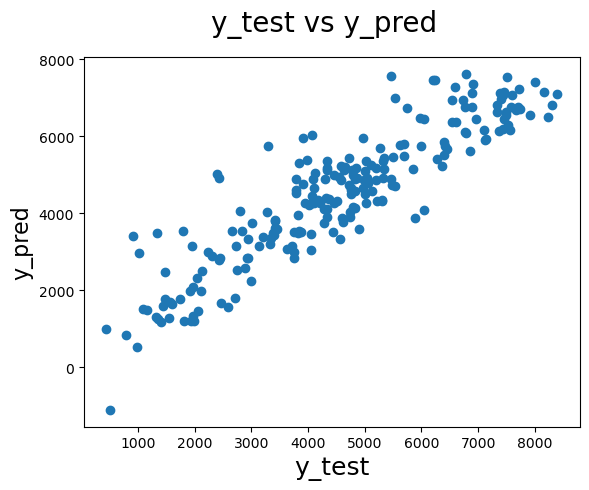

In [399]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [400]:
round(lr_m.params,4)

const                 1924.4285
yr                    2049.4213
workingday             482.4856
temp                  3539.0119
windspeed            -1190.3728
Sep                    570.9908
Sat                    572.1064
Light_Snow_Or_Rain   -2535.5623
Mist                  -683.9745
spring               -1027.7966
winter                 403.5003
dtype: float64

In [402]:
# Calculating Adjusted-R^2 value for the test dataset
r2 = r2_score(y_test, y_pred)
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7784


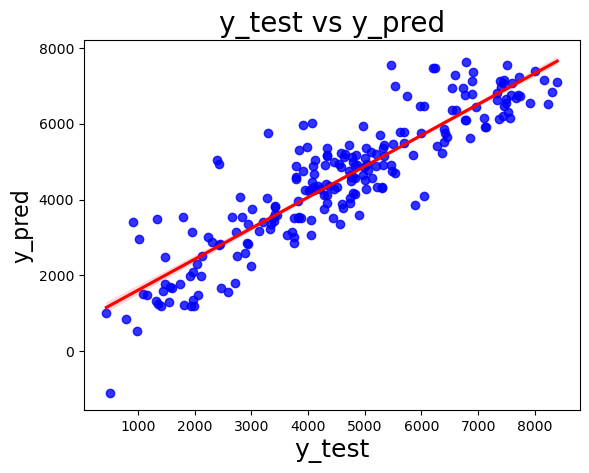

In [403]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7784
Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.